In [1]:
# Dependencies
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pprint import pprint

In [2]:
data_20406 = pd.read_csv('Resources/U20406.csv')
data_20306 = pd.read_csv('Resources/U20306.csv')
nondurable = pd.read_csv('Resources/nondurable_no_commas.csv')
# Remove white space from the left of the category names
nondurable['Consumption Category '] = nondurable['Consumption Category '].str.lstrip()
# Display table
nondurable.head()

,Consumption Category,2015M01,2015M02,2015M03,2015M04,2015M05,2015M06,2015M07,2015M08,2015M09,...,2019M12,2020M01,2020M02,2020M03,2020M04,2020M05,2020M06,2020M07,2020M08,2020M09
0,Nondurable goods,2660549,2667298,2674394,2673472,2684923,2686891,2703838,2705901,2716496,...,3008558,3021381,3021272,3169119,2755262,2978595,3109915,3134189,3116286,3170807
1,Food and beverages purchased for off-premises ...,879429,880382,884258,882702,883590,884369,886810,884787,888291,...,987425,984969,981102,1201697,1028276,1050767,1043761,1058238,1045782,1049660
2,Food and nonalcoholic beverages purchased for ...,758255,758743,761143,760391,760844,760881,762501,760588,763743,...,846297,843738,839913,1035444,879610,892912,885363,899938,886682,890498
3,Food purchased for off-premises consumption,670298,670911,672565,672575,672796,672519,673834,672420,674656,...,747599,745573,741871,920039,783298,794315,786017,798231,786446,789583
4,Cereals and bakery products,131299,131481,130979,130627,130858,130910,131009,131314,132304,...,142791,143562,143129,177724,150935,155017,153845,155114,153090,152942


In [3]:
data19 = nondurable.loc[:, ['Consumption Category ', '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06', '2019M07', '2019M08', '2019M09']]
data19.dtypes

data20 = nondurable.loc[:, ['Consumption Category ', '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06', '2020M07', '2020M08', '2020M09']]
data20.dtypes

Consumption Category     object
2020M01                   int64
2020M02                   int64
2020M03                   int64
2020M04                   int64
2020M05                   int64
2020M06                   int64
2020M07                   int64
2020M08                   int64
2020M09                   int64
dtype: object

In [4]:
# Compare alcohols
booze19 = data19.loc[(data19['Consumption Category '] == 'Spirits') | (data19['Consumption Category '] == 'Wine') | (data19['Consumption Category '] == 'Beer'), :]
booze19 = booze19.set_index('Consumption Category ')

booze20 = data20.loc[(data19['Consumption Category '] == 'Spirits') | (data19['Consumption Category '] == 'Wine') | (data19['Consumption Category '] == 'Beer'), :]
booze20 = booze20.set_index('Consumption Category ')

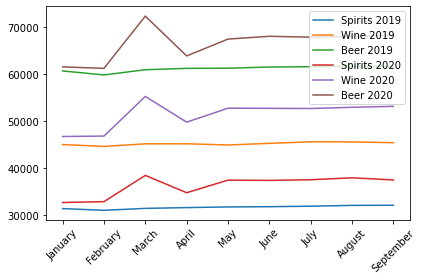

In [12]:
x_values = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September']

spirits19, = plt.plot(x_values, booze19.loc['Spirits', :], label='Spirits 2019')
wine19, = plt.plot(x_values, booze19.loc['Wine', :], label='Wine 2019')
beer19, = plt.plot(x_values, booze19.loc['Beer', :], label='Beer 2019')

spirits20, = plt.plot(x_values, booze20.loc['Spirits', :], label='Spirits 2020')
wine20, = plt.plot(x_values, booze20.loc['Wine', :], label='Wine 2020')
beer20, = plt.plot(x_values, booze20.loc['Beer', :], label='Beer 2020')

plt.legend(handles=[spirits19, wine19, beer19, spirits20, wine20, beer20], loc="best")
plt.xticks(rotation=45)
plt.tight_layout()